$X \sim U[0, \theta] \implies \theta^* = \left({(k + 1)m_k}\right)^{\frac{1}{k}}$

$X \sim Exp(\theta) \implies \theta^* = \left(\frac{m_k}{k!}\right)^{\frac{1}{k}}$

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (13, 9)})
sns.set(font_scale=1.7)

In [ ]:
class OneParamDistr:
    def __init__(self, param, name):
        self.param = param
        self.name = name
    
    def sample(self, s):
        raise NotImplementedError()

    def moments(self, samples, k):
        raise NotImplementedError()

class Uniform(OneParamDistr):
    def __init__(self, param):
        super().__init__(param, f'Uniform[0, {param}]')
    
    def sample(self, s):
        return np.random.uniform(0.0, self.param, s)
    
    def moments(self, samples, k):
        return ((k + 1) * np.mean(samples ** k)) ** (1 / k)

class Exp(OneParamDistr):
    def __init__(self, param):
        super().__init__(param, f'Exp({param})')
    
    def sample(self, s):
        return np.random.exponential(self.param, s)
    
    def moments(self, samples, k):
        return (np.mean(samples ** k) / np.math.factorial(k)) ** (1 / k)

In [ ]:
def plot_conv(means, 
              #stds, 
              title):
    x = np.arange(1, len(means) + 1)
    plt.plot(x, means)
    plt.title(title)
    plt.xlabel('k')
    plt.ylabel('Deviation')
    #plt.yscale('log')
    plt.show()

def test_conv(distr, max_k=200, n_samples=5000, tries=100):
    mses = []
    true_param = distr.param
    for k in range(1, max_k + 1):
        mse = 0
        for t in range(tries):
            samples = distr.sample(n_samples)
            m_param = distr.moments(samples, k)
            mse += (true_param - m_param) ** 2
        mses.append(np.sqrt(mse / t))
    plot_conv(mses, distr.name)

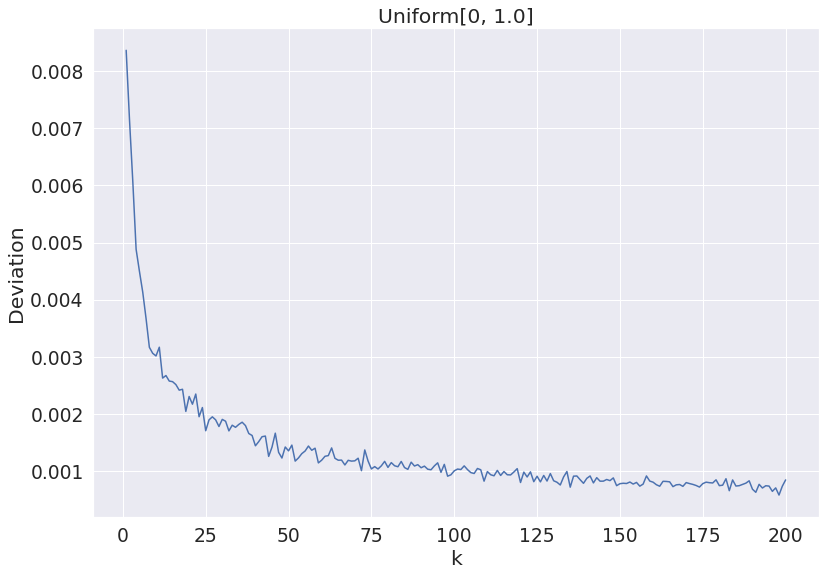

In [ ]:
test_conv(Uniform(1.0))

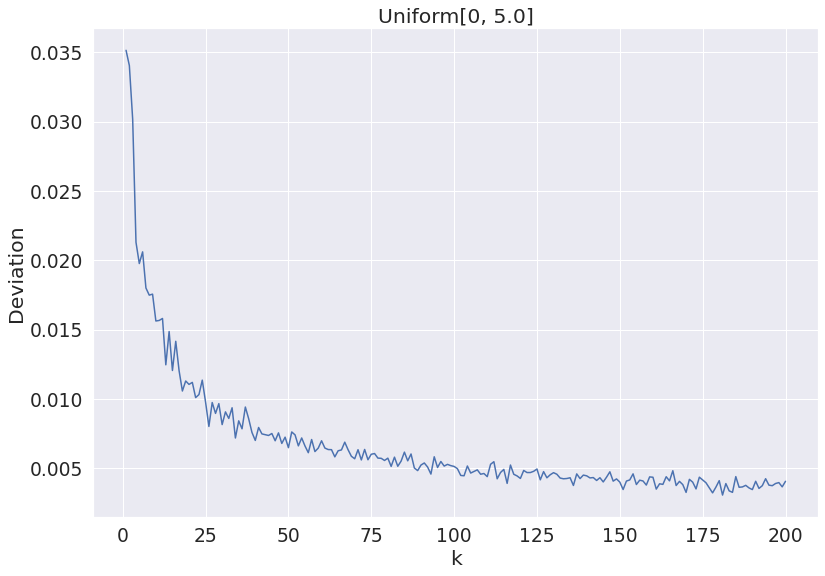

In [ ]:
test_conv(Uniform(5.0))

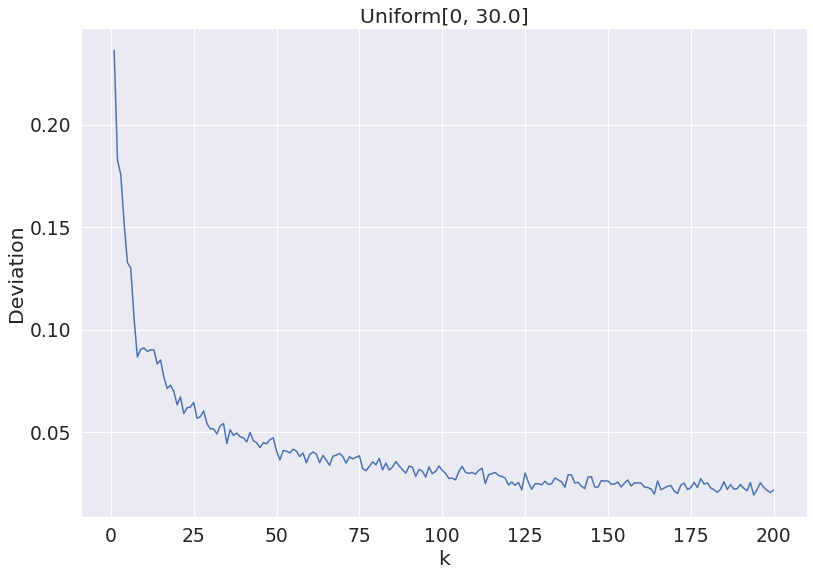

In [ ]:
test_conv(Uniform(30.0))

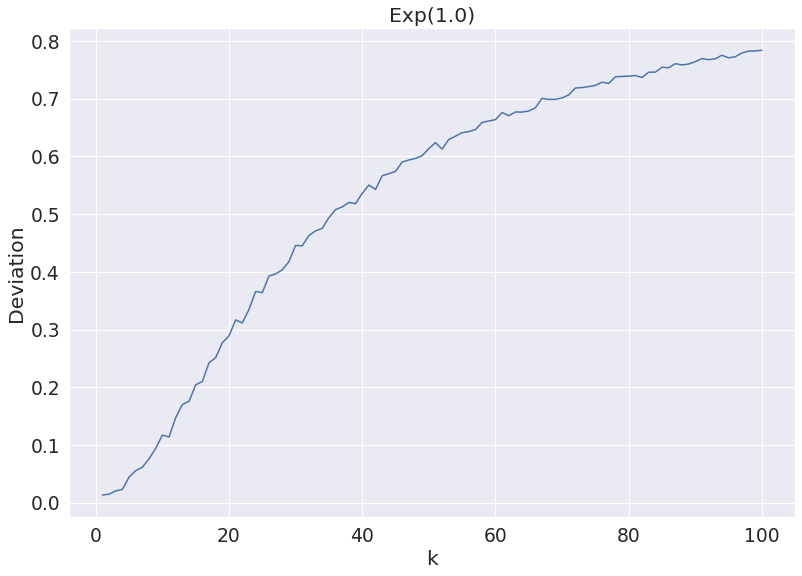

In [ ]:
test_conv(Exp(1.0), max_k=100)

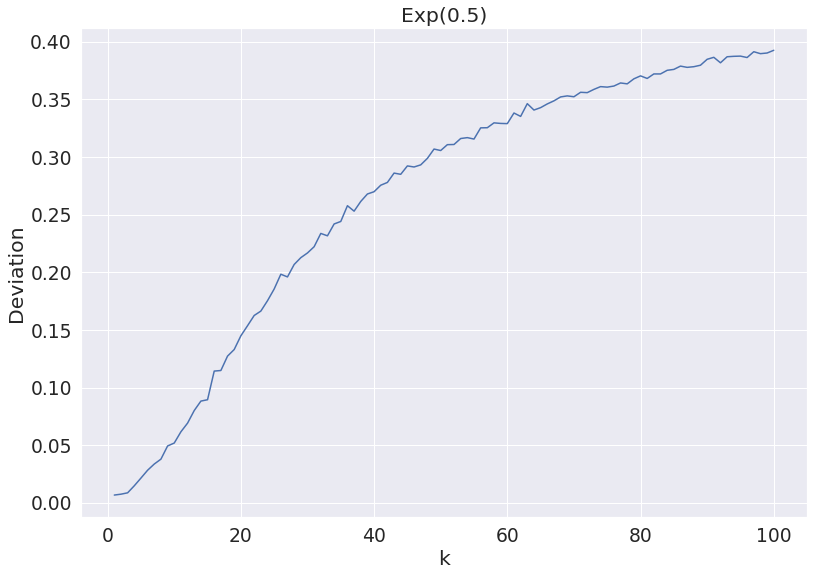

In [ ]:
test_conv(Exp(0.5), max_k=100)

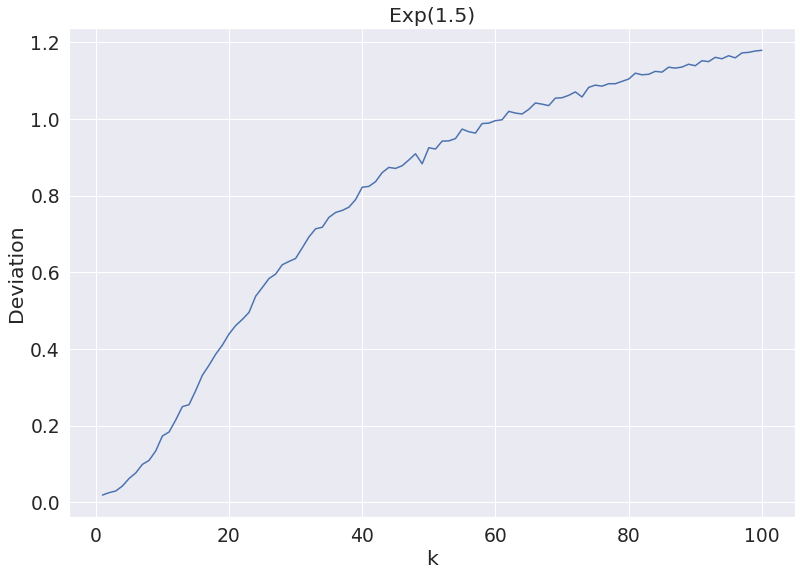

In [ ]:
test_conv(Exp(1.5), max_k=100)